In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

In [2]:
import acquisition
import clean
import importing

## Reading file

In [3]:
data=acquisition.open_file('../input/suicides.csv')

Reading csv file...


In [4]:
data_clean=data.copy()

In [5]:
print(data_clean['country'].dtype)

object


## Cleaning data

def delete_columns(dataframe,lista):
    for i in lista:
        dataframe.drop([i], axis=1, inplace = True)

In [6]:
def delete_rows(dataframe,lista):
    for i in lista:
        dataframe.drop([i], axis=0, inplace = True)

def delete_rows_excluding(dataframe,column,condition):
    dataframe=dataframe[dataframe[column] != condition]
    dataframe.reset_index(drop=True)
    return dataframe
    

columnstodelete=['HDI for year','country-year']

In [7]:
clean.delete_columns(data_clean,['HDI for year','country-year'])

Deleting columns...


In [8]:
data_clean.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [9]:
#data_clean = clean.delete_rows_excluding(data_clean,'country','Saint Vincent and Grenadines')

In [10]:
#data_clean = clean.resetindex(data_clean)

In [11]:
rows = data_clean.loc[data_clean['country']=='Saint Vincent and Grenadines']

In [12]:
rowsind = list(rows.index)
#data_clean= delete_rows(data_clean,rowsind)
rowsind

[21632,
 21633,
 21634,
 21635,
 21636,
 21637,
 21638,
 21639,
 21640,
 21641,
 21642,
 21643,
 21644,
 21645,
 21646,
 21647,
 21648,
 21649,
 21650,
 21651,
 21652,
 21653,
 21654,
 21655,
 21656,
 21657,
 21658,
 21659,
 21660,
 21661,
 21662,
 21663,
 21664,
 21665,
 21666,
 21667,
 21668,
 21669,
 21670,
 21671,
 21672,
 21673,
 21674,
 21675,
 21676,
 21677,
 21678,
 21679,
 21680,
 21681,
 21682,
 21683,
 21684,
 21685,
 21686,
 21687,
 21688,
 21689,
 21690,
 21691,
 21692,
 21693,
 21694,
 21695,
 21696,
 21697,
 21698,
 21699,
 21700,
 21701,
 21702,
 21703,
 21704,
 21705,
 21706,
 21707,
 21708,
 21709,
 21710,
 21711,
 21712,
 21713,
 21714,
 21715,
 21716,
 21717,
 21718,
 21719,
 21720,
 21721,
 21722,
 21723,
 21724,
 21725,
 21726,
 21727,
 21728,
 21729,
 21730,
 21731,
 21732,
 21733,
 21734,
 21735,
 21736,
 21737,
 21738,
 21739,
 21740,
 21741,
 21742,
 21743,
 21744,
 21745,
 21746,
 21747,
 21748,
 21749,
 21750,
 21751,
 21752,
 21753,
 21754,
 21755,
 21756,


In [13]:
for i in rowsind:
    data_clean.drop([i], axis=0, inplace = True)

In [14]:
data_clean.reset_index()

,index,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
5,5,Albania,1987,female,75+ years,1,35600,2.81,"2,156,624,900",796,G.I. Generation
6,6,Albania,1987,female,35-54 years,6,278800,2.15,"2,156,624,900",796,Silent
7,7,Albania,1987,female,25-34 years,4,257200,1.56,"2,156,624,900",796,Boomers
8,8,Albania,1987,male,55-74 years,1,137500,0.73,"2,156,624,900",796,G.I. Generation
9,9,Albania,1987,female,5-14 years,0,311000,0.00,"2,156,624,900",796,Generation X


In [15]:
#data_clean.to_csv('../output/Data_clean.csv', index=False)

## Importing from API

In [16]:
print(len(list(set(data_clean['country']))))

100


In [17]:
def apiimportlanguage(dataframe,url):
    languages={}
    countries = list(set(dataframe['country']))
    try:
        for i in range(len(countries)):
            countries[i]=countries[i].replace(' ','%20')
        for i in countries:
            res= requests.get(url+i)
            dev=res.json()
            languages.update({i.replace('%20',' '):dev[0]['languages'][0]['name']})
    except: print('Country not found!')
    return languages

In [18]:
def apiimportregion(dataframe,url):
    regions={}
    countries = list(set(dataframe['country']))
    try:
        for i in range(len(countries)):
            countries[i]=countries[i].replace(' ','%20')
        for i in countries:
            res= requests.get(url+i)
            dev=res.json()
            regions.update({i.replace('%20',' '):dev[0]['region']})
    except: print('Country not found!')
    return regions

In [19]:
dataframe=data_clean
url='https://restcountries.eu/rest/v2/name/'

In [20]:
languages = apiimportlanguage(dataframe,url)

In [21]:
regions = apiimportregion(dataframe,url)

In [22]:
len(languages)==len(regions), len(languages)

(True, 100)

In [23]:
data_clean[data_clean['country']=='Saint Vincent and Grenadines']

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation


In [24]:
def generatelist(x,column,dictionary):
    lst=[]
    for i in range(len(x[column])):
        lst.append(dictionary[x[column][i]])
    return lst

In [25]:
languages[data_clean['country'][22632]]

'English'

In [26]:

languageslist = generatelist(data_clean.reset_index(),'country',languages)

In [27]:
regionslist = generatelist(data_clean.reset_index(),'country',regions)

In [28]:
def add_columns(dataframe,column_name,lista):
    dataframe[column_name]=lista

In [29]:
add_columns(data_clean,'Language',languageslist)

In [30]:
add_columns(data_clean,'Region', regionslist)

In [31]:
def filteryear(dataframe,year):
    return dataframe[dataframe['year']>year]


In [32]:
#filteryear(data_clean,2000)

In [33]:
data_clean.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,Language,Region
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X,Albanian,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent,Albanian,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X,Albanian,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation,Albanian,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers,Albanian,Europe


In [34]:
df1 = data_clean.groupby(['year']).agg(['sum','mean'])

In [35]:
df1

suicides_no              population               suicides/100k pop  \
             sum        mean         sum          mean               sum   
year                                                                       
1985      116061  205.781915  1008510286  1.788139e+06           6779.10   
1986      120670  213.953901  1029818813  1.825920e+06           6579.84   
1987      126842  199.437107  1094937690  1.721600e+06           7545.45   
1988      121026  205.826531  1054094424  1.792678e+06           7473.13   
1989      160244  256.801282  1225514347  1.963965e+06           8036.54   
1990      193356  255.761905  1466525959  1.939849e+06           9806.69   
1991      198020  257.838542  1489988384  1.940089e+06          10321.06   
1992      211473  271.119231  1569539447  2.012230e+06          10528.88   
1993      221565  284.057692  1530416654  1.962073e+06          10790.29   
1994      232063  284.390931  1548749372  1.897977e+06          11483.79   
1995      243537  263.568182  1591463129  1.722363e+06          14574.85   
1996      246717  270.523026  1662171567  1.822557e+06          14057.15   
1997      240742  263.971491  1702895264  1.867210e+06          13787.81   
1998      249581  266.646368  1725084902  1.843039e+06          13956.30   
1999      256113  260.277439  1776266470  1.805149e+06          14408.11   
2000      255827  250.810784  1799130952  1.763854e+06          14343.34   
2001      250644  240.080460  1755468148  1.681483e+06          14115.55   
2002      256088  251.066667  1822055016  1.786328e+06          14024.79   
2003      256075  251.053922  1838359728  1.802313e+06          13576.67   
2004      240857  241.824297  1745147873  1.752156e+06          12535.34   
2005      234367  235.308233  1734810527  1.741778e+06          12092.88   
2006      233355  231.502976  1840809374  1.826200e+06          12043.94   
2007      233397  228.820588  1859464664  1.823005e+06          12307.76   
2008      235443  233.574405  1860521025  1.845755e+06          12105.55   
2009      243486  230.573864  1976128439  1.871334e+06          12164.86   
2010      238697  228.636973  1997197279  1.913024e+06          11789.16   
2011      236479  231.842157  1993262295  1.954179e+06          11320.86   
2012      230150  239.739583  1912711921  1.992408e+06          11004.62   
2013      223199  235.441983  1890061312  1.993736e+06          10663.64   
2014      222982  241.322511  1911956633  2.069217e+06          10225.95   
2015      203637  278.192623  1774556984  2.424258e+06           8225.91   
2016       15603   97.518750   132101896  8.256368e+05           2147.39   

                gdp_per_capita ($)                
           mean                sum          mean  
year                                              
1985  12.019681            3489084   6186.319149  
1986  11.666383            4083384   7240.042553  
1987  11.863915            5622864   8840.981132  
1988  12.709405            5870508   9983.857143  
1989  12.879071            6068424   9725.038462  
1990  12.971812            7500624   9921.460317  
1991  13.438880            7782096  10132.937500  
1992  13.498564            8195232  10506.707692  
1993  13.833705            8231796  10553.584615  
1994  14.073272            9438756  11567.102941  
1995  15.773647           11818992  12791.116883  
1996  15.413542           11559336  12674.710526  
1997  15.118213           11355240  12450.921053  
1998  14.910577           11460240  12243.846154  
1999  14.642388           12732372  12939.402439  
2000  14.062098           12816432  12565.129412  
2001  13.520642           12624876  12092.793103  
2002  13.749794           12960744  12706.611765  
2003  13.310461           15128280  14831.647059  
2004  12.585683           17832504  17904.120482  
2005  12.141446           20250540  20331.867470  
2006  11.948353           21490080  21319.523810  
2007  12.066431           24631152  24148.188235  
2008  12.009474   

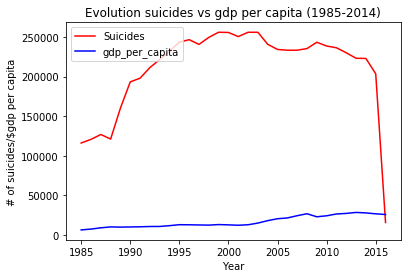

In [36]:
%matplotlib inline
plt.plot(df1['suicides_no']['sum'], label = 'Suicides', c='red')
plt.plot(df1['gdp_per_capita ($)']['mean'], label = 'gdp_per_capita', c='blue')
#print(sharks[sharks["Fatal (Y/N)"]=="Y"].groupby(["Year"]).count()["Fatal (Y/N)"].plot())
plt.legend(loc=2)
plt.title('Evolution suicides vs gdp per capita (1985-2014)')
plt.xlabel('Year')
plt.ylabel('# of suicides/$gdp per capita')
plt.show()

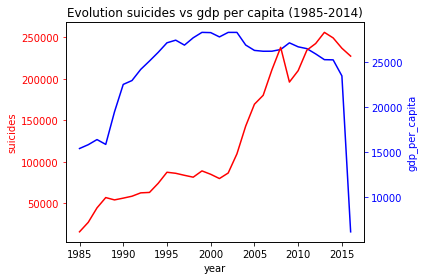

In [37]:
fig, ax1 = plt.subplots()
s1 = df1['suicides_no']['sum']
ax1.plot( s1, 'b-')
ax1.set_xlabel('year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('suicides', color='r')
ax1.tick_params('y', colors='r')

ax2 = ax1.twinx()
s2 = df1['gdp_per_capita ($)']['mean']
ax2.plot(s2, 'r')
ax2.set_ylabel('gdp_per_capita', color='b')
ax2.tick_params('y', colors='b')

#plt.legend(loc=2)
plt.title('Evolution suicides vs gdp per capita (1985-2014)')
fig.tight_layout()
plt.show()

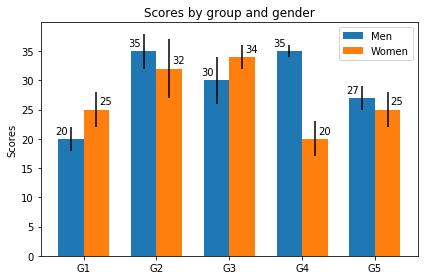

In [38]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


men_means, men_std = (20, 35, 30, 35, 27), (2, 3, 4, 1, 2)
women_means, women_std = (25, 32, 34, 20, 25), (3, 5, 2, 3, 3)

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, men_means, width, yerr=men_std,
                label='Men')
rects2 = ax.bar(ind + width/2, women_means, width, yerr=women_std,
                label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()

plt.show()


In [39]:
df2 = data_clean.groupby(['year','sex','generation']).agg(['sum','mean']).reset_index()
display(df2.head())

year     sex       generation suicides_no             population  \
                                         sum        mean        sum   
0  1985  female          Boomers        4894  104.127660   86508965   
1  1985  female  G.I. Generation       13068  139.021277  107628492   
2  1985  female     Generation X        5041   53.627660  194870955   
3  1985  female           Silent        9476  201.617021  123958743   
4  1985    male          Boomers       15877  337.808511   87009159   

                suicides/100k pop            gdp_per_capita ($)               
           mean               sum       mean                sum         mean  
0  1.840616e+06            227.53   4.841064             290757  6186.319149  
1  1.144984e+06            912.02   9.702340             581514  6186.319149  
2  2.073095e+06            244.27   2.598617             581514  6186.319149  
3  2.637420e+06            279.93   5.955957             290757  6186.319149  
4  1.851259e+06            733.31  15.602340             290757  6186.319149

In [40]:
pd.pivot_table(df2, values=[['suicides_no']['sum']], index=[ 'generation'], columns=['sex'])

TypeError: list indices must be integers or slices, not str

In [ ]:
df2['suicides_no']['sum']

In [ ]:
print(df2['suicides_no']['sum'].dtype)